In [66]:
%%bash
#conda update anaconda
#pip install pyldavis

In [75]:
import pandas as pd
import numpy as np
from gensim import corpora, models, similarities
import pickle
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO
from ast import literal_eval
import itertools
import pyLDAvis
import textblob as tb
import nltk
from nltk.stem import *
import slugify as sl
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [2]:
dropbox = "/Users/mr/Dropbox/moviemeta/"

In [104]:
def iterdocs(filepath):
    for line in open (filepath):
        yield literal_eval(line)
            
class Corpus(object):    
    def __init__(self, filename, excludes):
        self.filepath = dropbox + filename
        self.dictionary = corpora.Dictionary(iterdocs(self.filepath))
        #filter out the words with very low and very high document frequency
        self.dictionary.filter_extremes() 
        exclude_ids = []
        for token in excludes:
            try:
                token_id = self.dictionary.token2id[token]
                exclude_ids.append(token_id)
            except:
                pass
        self.dictionary.filter_tokens(exclude_ids)
    def __iter__(self):
        for doc in iterdocs(self.filepath):
            yield self.dictionary.doc2bow(doc)

In [34]:
corpus = Corpus('imdb_plots_since_2014.list',[])
dictionary = corpus.dictionary

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(31506 unique tokens: [u'fawn', u'isis-isil', u'fawk', u'woodi', u'chthonic']...)
INFO:gensim.corpora.dictionary:built Dictionary(42120 unique tokens: [u'fawn', u'dis-inform', u'fawl', u'isis-isil', u'fawk']...) from 16943 documents (total 722895 corpus positions)
INFO:gensim.corpora.dictionary:discarding 31858 tokens: [(u'hathaway', 4), (u'mlb', 2), (u'niqu', 2), (u'philanthropi', 2), (u'cho', 4), (u'busk', 4), (u'teo', 4), (u'brake', 3), (u'stefanescu', 1), (u'nothing', 2)]...
INFO:gensim.corpora.dictionary:keeping 10262 tokens which were in no less than 5 and no more than 8471 (=50.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary(10262 unique tokens: [u'woodi', u'foul', u'elvi', u'jihad', u'suzann']...)


In [35]:
dfs = sorted(dictionary.dfs.items(), key=lambda x : x[1], reverse=True)
words = [dictionary[tup[0]] for tup in dfs]
dfcounts = [tup[1] for tup in dfs]

In [36]:
def plot_dfs(words, counts,top=True, num=20):
    if top == True:
        words = words[:num]
        counts = counts[:num]
    else:
        words = words[-num:]
        counts = counts[-num:]
    plt.figure(figsize=(20,10))
    plt.bar(range(num), counts, color=sns.color_palette()[0])
    plt.xticks(range(num),words)
    plt.show()

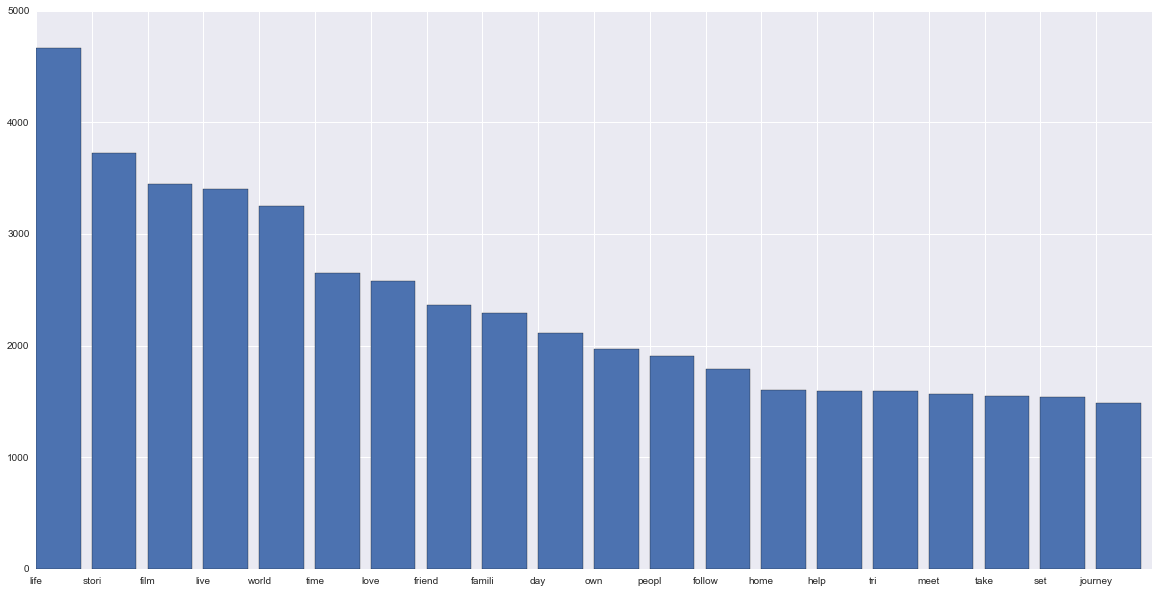

In [37]:
plot_dfs(words, dfcounts)

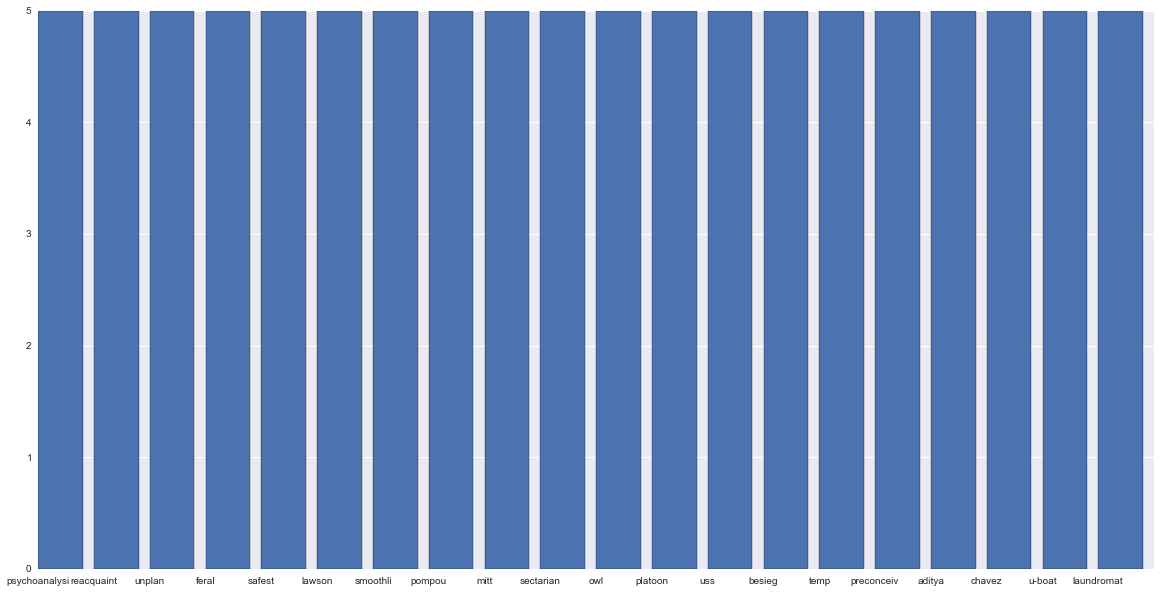

In [38]:
plot_dfs(words, dfcounts, top = False)

In [39]:
print words[:100]

[u'life', u'stori', u'film', u'live', u'world', u'time', u'love', u'friend', u'famili', u'day', u'own', u'peopl', u'follow', u'home', u'help', u'tri', u'meet', u'take', u'set', u'journey', u'chang', u'girl', u'forc', u'discov', u'begin', u'documentari', u'father', u'woman', u'struggl', u'start', u'decid', u'person', u'citi', u'come', u'dream', u'past', u'look', u'mother', u'tell', u'death', u'night', u'relationship', u'lead', u'call', u'leav', u'mysteri', u'explor', u'school', u'power', u'human', u'fight', u'secret', u'town', u'return', u'true', u'event', u'final', u'name', u'bring', u'learn', u'experi', u'hope', u'war', u'fall', u'run', u'hous', u'move', u'happen', u'play', u'save', u'soon', u'commun', u'short', u'dark', u'wife', u'kill', u'beauti', u'creat', u'boy', u'murder', u'surviv', u'left', u'charact', u'realiz', u'feel', u'search', u'music', u'son', u'daughter', u'american', u'plan', u'goe', u'littl', u'question', u'futur', u'countri', u'women', u'inspir', u'real', u'histori']

In [49]:
excludes = [u'life', u'stori', u'film', u'live', u'world', u'time',  u'day', u'own', u'peopl', u'follow', u'meet',
u'take', u'set', u'come', u'look', u'tell', u'call', u'name', u'bring', u'happen', u'soon', u'goe', u'littl']

In [188]:
common_names = []
for line in open(dropbox + '2000names.txt'):
    common_names.append(line[:-1])
common_names = map(lambda x : PorterStemmer().stem(sl.slugify(x)), common_names)
excludes = excludes + common_names
len(excludes)

3221

In [163]:
newcorpus = Corpus('imdb_plots_since_2014.list', excludes)
corpora.MmCorpus.serialize(dropbox + 'lda_imdb_2015.corpus', newcorpus)

INFO:gensim.corpora.mmcorpus:storing corpus in Matrix Market format to /Users/mr/Dropbox/moviemeta/lda_imdb_2015.corpus
INFO:gensim.matutils:saving sparse matrix to /Users/mr/Dropbox/moviemeta/lda_imdb_2015.corpus
INFO:gensim.matutils:PROGRESS: saving document #0
INFO:gensim.matutils:PROGRESS: saving document #1000
INFO:gensim.matutils:PROGRESS: saving document #2000
INFO:gensim.matutils:PROGRESS: saving document #3000
INFO:gensim.matutils:PROGRESS: saving document #4000
INFO:gensim.matutils:PROGRESS: saving document #5000
INFO:gensim.matutils:PROGRESS: saving document #6000
INFO:gensim.matutils:PROGRESS: saving document #7000
INFO:gensim.matutils:PROGRESS: saving document #8000
INFO:gensim.matutils:PROGRESS: saving document #9000
INFO:gensim.matutils:PROGRESS: saving document #10000
INFO:gensim.matutils:PROGRESS: saving document #11000
INFO:gensim.matutils:PROGRESS: saving document #12000
INFO:gensim.matutils:PROGRESS: saving document #13000
INFO:gensim.matutils:PROGRESS: saving docum

In [164]:
newdictionary = newcorpus.dictionary
newdictionary.save(dropbox + 'lda_imdb_2015.dict')
newdfs = sorted(newdictionary.dfs.items(), key=lambda x : x[1], reverse=True)
newwords = [newdictionary[tup[0]] for tup in newdfs]
newdfcounts = [tup[1] for tup in newdfs]


INFO:gensim.utils:saving Dictionary object under /Users/mr/Dropbox/moviemeta/lda_imdb_2015.dict, separately None


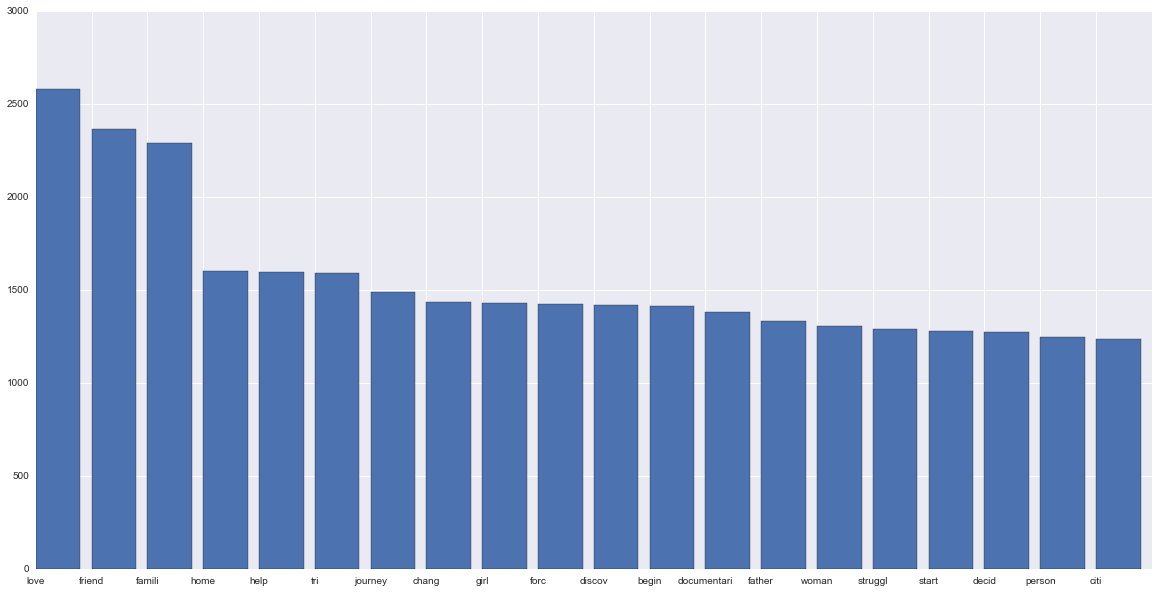

In [107]:
plot_dfs(newwords, newdfcounts)

In [108]:
tfidf = models.TfidfModel(newcorpus)
corpus_tfidf = tfidf[newcorpus]

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #10000
INFO:gensim.models.tfidfmodel:calculating IDF weights for 16943 documents and 9547 features (535551 matrix non-zeros)


In [109]:
lsi = models.LsiModel(corpus_tfidf, id2word=newdictionary, num_topics=20)
corpus_lsi = lsi[corpus_tfidf] 

INFO:gensim.models.lsimodel:using serial LSI version on this node
INFO:gensim.models.lsimodel:updating model with new documents
INFO:gensim.models.lsimodel:preparing a new chunk of documents
INFO:gensim.models.lsimodel:using 100 extra samples and 2 power iterations
INFO:gensim.models.lsimodel:1st phase: constructing (9548, 120) action matrix
INFO:gensim.models.lsimodel:orthonormalizing (9548, 120) action matrix
INFO:gensim.models.lsimodel:2nd phase: running dense svd on (120, 16943) matrix
INFO:gensim.models.lsimodel:computing the final decomposition
INFO:gensim.models.lsimodel:keeping 20 factors (discarding 64.717% of energy spectrum)
INFO:gensim.models.lsimodel:processed documents up to #16943
INFO:gensim.models.lsimodel:topic #0(13.698): 0.139*"love" + 0.131*"famili" + 0.125*"friend" + 0.096*"girl" + 0.096*"father" + 0.092*"home" + 0.090*"tri" + 0.085*"mother" + 0.084*"dream" + 0.084*"chang"
INFO:gensim.models.lsimodel:topic #1(6.839): 0.299*"music" + 0.221*"documentari" + 0.183*"ar

In [44]:
lsi.print_topics(20)

INFO:gensim.models.lsimodel:topic #0(13.197): 0.135*"love" + 0.129*"famili" + 0.118*"friend" + 0.094*"girl" + 0.092*"father" + 0.088*"home" + 0.087*"tri" + 0.083*"woman" + 0.083*"dream" + 0.082*"chang"
INFO:gensim.models.lsimodel:topic #1(6.576): -0.303*"music" + -0.223*"documentari" + -0.185*"artist" + -0.170*"art" + 0.128*"father" + -0.124*"featur" + -0.120*"explor" + 0.115*"mother" + -0.112*"cultur" + 0.111*"friend"
INFO:gensim.models.lsimodel:topic #2(5.696): 0.284*"love" + 0.189*"music" + 0.171*"relationship" + -0.169*"war" + 0.156*"girl" + -0.156*"murder" + -0.133*"investig" + 0.133*"friend" + -0.129*"kill" + -0.124*"polic"
INFO:gensim.models.lsimodel:topic #3(5.261): 0.324*"music" + -0.259*"famili" + -0.203*"father" + 0.192*"friend" + 0.151*"night" + -0.143*"war" + -0.141*"mother" + 0.139*"murder" + 0.111*"killer" + -0.106*"son"
INFO:gensim.models.lsimodel:topic #4(5.113): 0.271*"music" + 0.270*"famili" + -0.254*"love" + 0.238*"father" + -0.201*"woman" + 0.190*"school" + 0.162*"

[u'0.135*"love" + 0.129*"famili" + 0.118*"friend" + 0.094*"girl" + 0.092*"father" + 0.088*"home" + 0.087*"tri" + 0.083*"woman" + 0.083*"dream" + 0.082*"chang"',
 u'-0.303*"music" + -0.223*"documentari" + -0.185*"artist" + -0.170*"art" + 0.128*"father" + -0.124*"featur" + -0.120*"explor" + 0.115*"mother" + -0.112*"cultur" + 0.111*"friend"',
 u'0.284*"love" + 0.189*"music" + 0.171*"relationship" + -0.169*"war" + 0.156*"girl" + -0.156*"murder" + -0.133*"investig" + 0.133*"friend" + -0.129*"kill" + -0.124*"polic"',
 u'0.324*"music" + -0.259*"famili" + -0.203*"father" + 0.192*"friend" + 0.151*"night" + -0.143*"war" + -0.141*"mother" + 0.139*"murder" + 0.111*"killer" + -0.106*"son"',
 u'0.271*"music" + 0.270*"famili" + -0.254*"love" + 0.238*"father" + -0.201*"woman" + 0.190*"school" + 0.162*"brother" + -0.154*"relationship" + -0.154*"human" + 0.146*"son"',
 u'-0.393*"school" + 0.355*"music" + -0.214*"student" + -0.195*"girl" + -0.166*"friend" + 0.139*"father" + 0.139*"son" + 0.134*"daughter"

In [131]:
with open(dropbox +'imdb_movies_since_2014.pickle', 'rb') as f:
    movies = np.load(f)

In [66]:
for i,doc in enumerate(itertools.islice(corpus_lsi, 0, 10)):
    doc.sort(key=lambda x: x[1],reverse=True)
    print doc[0]
    print movies[i]

(0, 0.065850364289396834)
#1 at the Apocalypse Box Office (2015)
(0, 0.14184851335266557)
#50Fathers (2015)
(0, 0.085998619372859755)
#BeRobin the Movie (2015)
(0, 0.19780709665365384)
#Beings (2015)
(0, 0.11232922060922973)
#Disneyland60 (2015)
(0, 0.042578500006786278)
#GirlCrush (2015)
(0, 0.12598498811788805)
#Horror (2015)
(0, 0.060040851678370907)
#Insocial (2015)
(0, 0.071535628086177)
#Lucky Number (2015)
(0, 0.09732057128021937)
#O2LForever (2015)


In [110]:
lda = models.LdaModel(newcorpus,id2word=newdictionary, num_topics=20)
lda.save(dropbox +'lda_imdb_2015.model')

INFO:gensim.models.ldamodel:using symmetric alpha at 0.05
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 20 topics, 1 passes over the supplied corpus of 16943 documents, updating model once every 2000 documents, evaluating perplexity every 16943 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/16943
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 16943 documents
INFO:gensim.models.ldamodel:topic #14 (0.050): 0.006*kill + 0.006*war + 0.005*death + 0.004*girl + 0.004*return + 0.004*help + 0.004*friend + 0.004*save + 0.003*home + 0.003*famili
INFO:gensim.models.ldamodel:topic #9 (0.050): 0.006*friend + 0.006*school + 0.006*discov + 0.006*love + 0.005*student + 0.005*journey + 0.005*final + 0.005*famili + 0.004*mother + 0.004*fight
INFO:gensim.models.ldamodel:topic #8 (0.050): 0.008*love + 0.005*begin + 

In [111]:
lda.show_topics(20)

[u'0.009*zombi + 0.009*japanes + 0.008*camp + 0.007*surviv + 0.007*human + 0.006*medic + 0.004*patient + 0.004*diseas + 0.004*scientist + 0.004*death',
 u'0.006*novel + 0.005*club + 0.005*master + 0.005*plan + 0.004*villag + 0.004*night + 0.004*play + 0.004*love + 0.004*write + 0.004*chang',
 u'0.015*war + 0.010*human + 0.007*earth + 0.006*surviv + 0.006*race + 0.006*journey + 0.006*american + 0.006*forc + 0.005*fight + 0.005*anim',
 u'0.012*friend + 0.009*play + 0.009*comedi + 0.007*love + 0.005*start + 0.005*relationship + 0.005*girl + 0.005*parti + 0.004*charact + 0.004*success',
 u'0.011*documentari + 0.011*citi + 0.008*histori + 0.007*rock + 0.006*industri + 0.006*activist + 0.005*right + 0.005*band + 0.005*punk + 0.005*includ',
 u'0.039*love + 0.014*relationship + 0.010*woman + 0.010*marri + 0.009*famili + 0.008*coupl + 0.007*fall + 0.007*marriag + 0.007*decid + 0.006*dream',
 u'0.030*music + 0.018*artist + 0.015*art + 0.009*perform + 0.007*record + 0.006*musician + 0.006*creat +

In [112]:
for bow in itertools.islice(newcorpus, 0, 10):
    topics = lda.get_document_topics(bow)
    print topics
    print lda.print_topic(topics[0][0])
    print " ".join([newdictionary[e[0]] for e in bow])
    print "=========================================="

[(2, 0.48240797589126538), (7, 0.17755956339132672), (19, 0.28336579293998276)]
0.015*war + 0.010*human + 0.007*earth + 0.006*surviv + 0.006*race + 0.006*journey + 0.006*american + 0.006*forc + 0.005*fight + 0.005*anim
self person movi prove apocalypt imagin useless camera hard declar post jule determin difficult
[(3, 0.037689295922134651), (8, 0.078862993931313963), (9, 0.57029608557087597), (11, 0.17351440983208932), (15, 0.041971001496797958), (18, 0.084204674517796479)]
0.012*friend + 0.009*play + 0.009*comedi + 0.007*love + 0.005*start + 0.005*relationship + 0.005*girl + 0.005*parti + 0.004*charact + 0.004*success
friend team sign privi nation prospect candid select lifestyl comedi haven month interview profession chip all-american sport death start decid american imagin dominiqu discov adult mind bad make youtub athlet father channel parent school enjoy blue post individu serv dramat draft contract potenti brother pay nfl hilari
[(4, 0.077901231318076136), (6, 0.22835600691739263

In [124]:
index = similarities.MatrixSimilarity(lda[viscorpus], num_features=20)

INFO:gensim.similarities.docsim:creating matrix with 16943 documents and 20 features


In [161]:
spectre = viscorpus[12161]
vec_lda = lda[spectre]
index[vec_lda]
sims = sorted(enumerate(index[vec_lda]), key=lambda item: -item[1])
for doc_sim in sims[:10]:
    print movies[doc_sim[0]] + " similarity:" + str(doc_sim[1])
    #vec = viscorpus[doc_sim[0]]
    #for tup in vec:
     #   print newdictionary.id2token[tup[0]]

Spectre (2015) similarity:1.0
Too Far (2016) similarity:0.955333
Run All Night (2015) similarity:0.954524
Jazbaa (2015) similarity:0.954156
Achilles: The Hit (2015) similarity:0.948589
Mouthpiece (2015) similarity:0.947183
Geukbisusa (2015) similarity:0.946083
Im Namen meines Sohnes (2015) (TV) similarity:0.945385
Heart of Wilderness (2015) similarity:0.942372
Een lijk in het bos (2015) similarity:0.941348


In [187]:
imdb_corpus = Corpus('imdb_plots.list', excludes)
corpora.MmCorpus.serialize(dropbox + 'lda_imdb.corpus', imdb_corpus)

INFO:gensim.corpora.mmcorpus:storing corpus in Matrix Market format to /Users/mr/Dropbox/moviemeta/lda_imdb.corpus
INFO:gensim.matutils:saving sparse matrix to /Users/mr/Dropbox/moviemeta/lda_imdb.corpus
INFO:gensim.matutils:PROGRESS: saving document #0
INFO:gensim.matutils:PROGRESS: saving document #1000
INFO:gensim.matutils:PROGRESS: saving document #2000
INFO:gensim.matutils:PROGRESS: saving document #3000
INFO:gensim.matutils:PROGRESS: saving document #4000
INFO:gensim.matutils:PROGRESS: saving document #5000
INFO:gensim.matutils:PROGRESS: saving document #6000
INFO:gensim.matutils:PROGRESS: saving document #7000
INFO:gensim.matutils:PROGRESS: saving document #8000
INFO:gensim.matutils:PROGRESS: saving document #9000
INFO:gensim.matutils:PROGRESS: saving document #10000
INFO:gensim.matutils:PROGRESS: saving document #11000
INFO:gensim.matutils:PROGRESS: saving document #12000
INFO:gensim.matutils:PROGRESS: saving document #13000
INFO:gensim.matutils:PROGRESS: saving document #14000

In [166]:
imdb_dict = imdb_corpus.dictionary
imdb_dict.save(dropbox + 'lda_imdb.dict')
imdb_dfs = sorted(imdb_dict.dfs.items(), key=lambda x : x[1], reverse=True)
imdb_words = [imdb_dict[tup[0]] for tup in imdb_dfs]
imdb_dfcounts = [tup[1] for tup in imdb_dfs]

INFO:gensim.utils:saving Dictionary object under /Users/mr/Dropbox/moviemeta/lda_imdb.dict, separately None


In [167]:
imdb_lda = models.LdaModel(imdb_corpus,id2word=imdb_dict, num_topics=30)
imdb_lda.save(dropbox +'lda_imdb.model')

INFO:gensim.models.ldamodel:using symmetric alpha at 0.0333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 30 topics, 1 passes over the supplied corpus of 259028 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/259028
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 259028 documents
INFO:gensim.models.ldamodel:topic #6 (0.033): 0.007*love + 0.004*documentari + 0.004*explor + 0.004*move + 0.003*begin + 0.003*game + 0.003*chang + 0.003*famili + 0.003*hous + 0.003*event
INFO:gensim.models.ldamodel:topic #23 (0.033): 0.010*love + 0.005*friend + 0.005*girl + 0.004*decid + 0.004*documentari + 0.004*chang + 0.004*discov + 0.004*phone + 0.003*famili + 0.003*parti
INFO:gensim.models.ldamodel:topic #9 (0.033): 0.007*

In [189]:
wiki_corpus = Corpus('wiki_plots_2000-2015.list', excludes)
corpora.MmCorpus.serialize(dropbox + 'lda_wiki.corpus', wiki_corpus)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(61971 unique tokens: [u'fawn', u'gima-c-nez', u'min-je', u'circuitri', u'fawk']...)
INFO:gensim.corpora.dictionary:built Dictionary(90879 unique tokens: [u'fawn', u'cat-and-dog', u'circuitri', u'fawk', u'sonji']...) from 18790 documents (total 2735687 corpus positions)
INFO:gensim.corpora.dictionary:discarding 69918 tokens: [(u'screenaasylum', 4), (u'jalaja', 3), (u'thenali', 4), (u'panchabhootham', 2), (u'djerba', 1), (u'aicha', 4), (u'cardiff', 4), (u'holgua', 2), (u'carril', 2), (u'reinaldo', 2)]...
INFO:gensim.corpora.dictionary:keeping 20961 tokens which were in no less than 5 and no more than 9395 (=50.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary(20961 unique tokens: [u'fawn', u'mohini', u'woodi', u'paruchuri', u're-captur']...)
INFO:gensim.corpora.mmcorpus:storing corpus in Matrix Market format t

In [190]:
wiki_dict = wiki_corpus.dictionary
wiki_dict.save(dropbox + 'lda_wiki.dict')
wiki_dfs = sorted(wiki_dict.dfs.items(), key=lambda x : x[1], reverse=True)
wiki_words = [wiki_dict[tup[0]] for tup in wiki_dfs]
wiki_dfcounts = [tup[1] for tup in wiki_dfs]

INFO:gensim.utils:saving Dictionary object under /Users/mr/Dropbox/moviemeta/lda_wiki.dict, separately None


In [191]:
wiki_lda = models.LdaModel(wiki_corpus,id2word=wiki_dict, num_topics=30)
wiki_lda.save(dropbox +'lda_wiki.model')

INFO:gensim.models.ldamodel:using symmetric alpha at 0.0333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 30 topics, 1 passes over the supplied corpus of 18790 documents, updating model once every 2000 documents, evaluating perplexity every 18790 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/18790
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 18790 documents
INFO:gensim.models.ldamodel:topic #2 (0.033): 0.006*kill + 0.005*friend + 0.005*tri + 0.004*leav + 0.004*love + 0.004*famili + 0.003*discov + 0.003*start + 0.003*return + 0.003*arriv
INFO:gensim.models.ldamodel:topic #6 (0.033): 0.008*love + 0.005*friend + 0.005*leav + 0.004*fall + 0.004*kill + 0.004*famili + 0.004*decid + 0.004*start + 0.004*return + 0.004*father
INFO:gensim.models.ldamodel:topic #9 (0.033): 0.006*kill + 0.005*wom

In [177]:
#visualize(imdb_lda, imdb_dict, dropbox + 'imdb_plots.list')
#gensimvis doesn't accept an iterator we must create a new corpus as a list
documents = [literal_eval(line) for line in open(dropbox + 'imdb_plots.list')]
vis_corpus = [imdb_dict.doc2bow(doc) for doc in documents]
vis_data = gensimvis.prepare(lda, vis_corpus, imdb_dict)
pyLDAvis.display(vis_data)
pyLDAvis.save_html(vis_data, dropbox + 'imdb_ldavis.html')

In [192]:
wiki_docs = [literal_eval(line) for line in open(dropbox + 'wiki_plots_2000-2015.list')]
wiki_vis_corpus = [wiki_dict.doc2bow(doc) for doc in wiki_docs]
wiki_vis_data = gensimvis.prepare(wiki_lda, wiki_vis_corpus, wiki_dict)
pyLDAvis.save_html(wiki_vis_data, dropbox + 'wiki_ldavis.html')
pyLDAvis.display(wiki_vis_data)